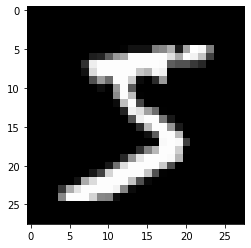

In [3]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[0], cmap="gray")

In [4]:
x_train[0].shape

(28, 28)

In [5]:
28*28

784

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
# rescale to between 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
encoder_input = keras.Input(shape=(28,28,1), name='img')
x = keras.layers.Flatten()(encoder_input)
x = keras.layers.Dense(256)(x)
encoder_output = keras.layers.Dense(128)(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256)(encoder_output)
x = keras.layers.Dense(784, activation='relu')(decoder_input)
decoder_output = keras.layers.Reshape((28,28,1))(x)

optimizer = keras.optimizers.Adam()

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()



Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 784)               201488    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         

In [ ]:
autoencoder.fit(x_train, x_train)